In [59]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

from collections import Counter
from wordcloud import WordCloud

# Code to download corpora
import nltk

nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edwardmcmillan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/edwardmcmillan/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/edwardmcmillan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
# Set path to CSV and read in CSV
csv_path = Path('elonmusk.csv')
musk_df = pd.read_csv(csv_path)
musk_df.set_index(pd.to_datetime(musk_df['date'], infer_datetime_format=True), inplace=True)
musk_df.drop(columns=['date'], inplace=True)
musk_df.head()

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
date,,,,,,,,,,,,,,,,,,,,,
2020-07-14,1282939902531796993,1282933079431151618,1594711683000,07:28:03,UTC,44196397,elonmusk,Elon Musk,NaN,Cute,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2020-07-14,1282844872571904000,1282801938111791104,1594689026000,01:10:26,UTC,44196397,elonmusk,Elon Musk,NaN,Wow,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2020-07-13,1282805559834492929,1282758532312584193,1594679653000,22:34:13,UTC,44196397,elonmusk,Elon Musk,NaN,Reusability is essential. A rocket that is sin...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2020-07-13,1282800187308572672,1282671714657157120,1594678372000,22:12:52,UTC,44196397,elonmusk,Elon Musk,NaN,Wild times!,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN
2020-07-13,1282800078000803840,1282739486816964615,1594678346000,22:12:26,UTC,44196397,elonmusk,Elon Musk,NaN,We’re being extra paranoid. Maximizing probabi...,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '44196397', 'username': 'elonmusk...",NaN,NaN,NaN,NaN


In [61]:
corpus = musk_df['tweet']

In [62]:
lemmatizer = WordNetLemmatizer()

In [63]:
# Define preprocess function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [64]:
# Define the counter function
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [65]:
word_counter(corpus)

,word,count
0,tesla,815
1,car,465
2,yes,461
3,good,364
4,wa,343
5,like,307
6,year,306
7,model,306
8,would,291
9,great,271


In [66]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [67]:
bigram_counter(corpus)

,bigram,count
0,"(coming, soon)",73
1,"(next, year)",54
2,"(next, week)",47
3,"(falcon, heavy)",47
4,"(good, point)",44
5,"(pretty, much)",36
6,"(boring, company)",35
7,"(model, x)",35
8,"(youre, welcome)",33
9,"(year, ago)",30


In [68]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [69]:
big_string = ' '.join(corpus)
input_words = process_text(big_string)

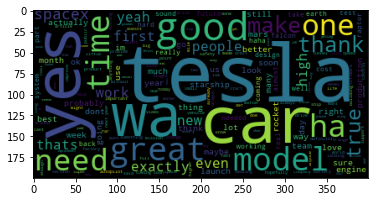

In [70]:
wc = WordCloud().generate(input_words)
plt.imshow(wc)

In [71]:
from nltk.util import ngrams

In [72]:
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [73]:
input_bigrams = process_text_bg(big_string)

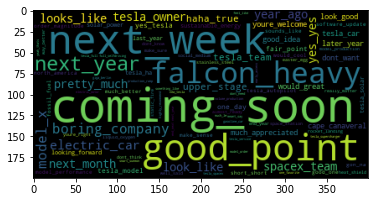

In [74]:
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)

In [75]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edwardmcmillan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0
    if score >= 0.05:
        result = 1
    elif score <= -0.05:
        result = -1
       
    return result

In [78]:
#sentiment Scores Dictionaries
tweet = {
    'tweet_compound': [],
    'tweet_pos': [],
    'tweet_neu': [],
    'tweet_neg': [],
    'tweet_sent':[],
}


In [79]:
for index, row in musk_df.iterrows():
    try:
        tweet_sentiment = analyzer.polarity_scores(row['tweet'])
        tweet['tweet_compound'].append(tweet_sentiment['compound'])
        tweet['tweet_pos'].append(tweet_sentiment['pos'])
        tweet['tweet_neu'].append(tweet_sentiment['neu'])
        tweet['tweet_neg'].append(tweet_sentiment['neg'])
        tweet['tweet_sent'].append(get_sentiment(tweet_sentiment['compound']))
        
        
    except AttributeError:
        pass
    
tweet_sentiment_df = pd.DataFrame(tweet)

tweet_sentiment_df.head(20)

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,0.4588,1.000,0.000,0.000,1
1,0.5859,1.000,0.000,0.000,1
2,-0.3400,0.000,0.902,0.098,-1
3,0.0000,0.000,1.000,0.000,0
4,0.4215,0.257,0.608,0.135,1
5,0.4588,0.750,0.250,0.000,1
6,0.8519,0.409,0.541,0.050,1
7,0.5267,0.239,0.761,0.000,1
8,0.0000,0.000,0.000,0.000,0
9,0.0000,0.000,1.000,0.000,0


In [80]:
tweet_sentiment_df.describe()

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
count,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000
mean,0.176196,0.207646,0.731253,0.050226,0.322421
std,0.364829,0.291614,0.305818,0.126857,0.714243
min,-0.963800,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.589000,0.000000,0.000000
50%,0.000000,0.077000,0.816000,0.000000,0.000000
75%,0.440400,0.302000,1.000000,0.000000,1.000000
max,0.978700,1.000000,1.000000,1.000000,1.000000


In [81]:
musk_df.columns

Index(['id', 'conversation_id', 'created_at', 'time', 'timezone', 'user_id',
       'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [82]:
musk_df = musk_df.drop(columns=['id', 'conversation_id', 'created_at','time','timezone','user_id', 'username','name','place','mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags', 'cashtags','link','retweet', 'quote_url', 'video','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest'
])
musk_df

,tweet
date,
2020-07-14,Cute
2020-07-14,Wow
2020-07-13,Reusability is essential. A rocket that is sin...
2020-07-13,Wild times!
2020-07-13,We’re being extra paranoid. Maximizing probabi...
2020-07-13,Welcome anytime
2020-07-13,"Well, I do care very much about sustainability..."
2020-07-13,"Yes, in plan. Superchargers and public high po..."
2020-07-13,👀


In [23]:
# Save the file for forthcoming usage
file_path = Path("tweet_sent.csv")
tweet_sent.to_csv(file_path, index=False)